In [1]:
import numpy as np
import matplotlib.pyplot as sp
A = sp.imread("cheval.jpg")
B = A.copy()

In [87]:
print("Exercice")
print("-----------Affichons la taille et le format-----------------------------")
print("la taille",np.product(A.shape))
print("le format", A.shape)
def getpixel(M,x,y):
    return tuple(M[x,y])
def putpixel(M,x,y,r,g,b):
    M[x,y,0] = r
    M[x,y,1] = g
    M[x,y,2] = b
print(getpixel(B,200,250))
putpixel(B,200,250,250,250,250)
sp.imsave(B,"simple.png",cmap="gray",format="png")

Exercice
-----------Affichons la taille et le format-----------------------------


NameError: name 'A' is not defined

In [1]:
import numpy as np
import matplotlib.pyplot as sp
def normaliser(A,vmax=255,vmin=0):
    return np.round((A-A.min())*((vmax-vmin)/(A.max()-A.min())) + vmin)
def egalisation(B,vmax=255,vmin=0):
    x,n=np.unique(B, return_counts=True)
    N = np.cumsum(n)
    B = (((vmax-vmin)/B.size)*np.interp(B, x, N)) + vmin
    return B
def functEgalisation(img, Vmax=255, Vmin=0):
    IMG = img.copy()
    couche = np.zeros((img.shape[0],img.shape[1],img.shape[2]))
    k = img.shape[2]
    for j in range(k):
        couche[:,:,j]=egalisation(IMG[:,:,j],Vmax,Vmin)
        IMG[:,:,j] = couche[:,:,j]
    return IMG
def poolingmoyens(M,d):
    ligne = M.shape[0]
    colone = M.shape[1]
    Nligne = ligne // d
    Ncolone = colone // d
    A = np.zeros((Nligne,Ncolone))
    ide = 0
    jd = 0
    for i in range(Nligne):
        jd = 0
        for j in range(Ncolone):
            if i == (Nligne - 1) and (Nligne * d) != ligne:
                ifin = ide + (ligne - (Nligne * d))
            else:
                ifin = ide + d
            if j == (Ncolone - 1) and (Ncolone * d) != colone:
                jfin = jd + (colone - (Ncolone * d))
            else:
                jfin = jd + d
            A[i,j] = np.mean(M[ide:ifin,jd:jfin])
            jd = jfin
        ide = ifin
    return A
def functPooling(img,diviseur):
    IMG = img.copy()
    ligne = IMG.shape[0] // diviseur
    colone = IMG.shape[1] // diviseur
    couche = np.zeros((ligne,colone,img.shape[2]))
    k = img.shape[2]
    for j in range(k):
        couche[::,::,j]=poolingmoyens(IMG[::,::,j],diviseur)
    return couche


In [118]:
#exercice 4
def mirroir(img):
    return np.concatenate(img,np.fliplr(img)) # our img[:,::-1:,:]

(1200, 1200, 3)


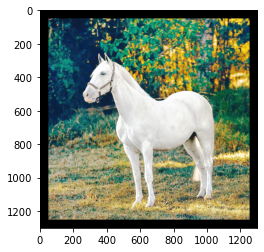

In [164]:
cheval = sp.imread('cheval.jpg')
def rotation(M): #le jeu d'une image
    #l = M.shape[0]//2
   # ll = M.shape[1]//2
    N = M.copy()
    N[:,:,0] = M[:,:,0]
    N[:,:,2] = M[::-1,:,1].T
    N[:,:,1] = M[:,:,2].T
    return N
def rotations(M,d):
    #l = M.shape[0]//2
   # ll = M.shape[1]//2
    N = M.copy()
    N[:,:,0] = M[:,:,0].T
    N[:,:,1] = M[:,:,1].T
    N[:,:,2] = M[:,:,2].T
    if d==0:
        N = N[:,::-1,:]
    else:
         N = N[::-1,:,:]
    return N
def cadre_noir_interieur(image, ep):
    img = image.copy()
    x = img.shape[0]-ep
    y = img.shape[1]-ep
    img[0:ep,:,:] = 0
    img[:,0:ep,:] = 0
    img[x:,:,:] = 0
    img[:,y:,:] = 0
    return  img
def cadre_noir_exterieur(image, ep):
    img = np.zeros((image.shape[0]+2*ep,image.shape[1]+2*ep,image.shape[2]))
    img[:,:,:]
    x = img.shape[0]-ep
    y = img.shape[1]-ep
    img[ep:x,ep:y,:] = egalisation(image,1,0)
    return  img
print(cheval.shape)
sp.imshow(cadre_noir_exterieur(cheval,50))

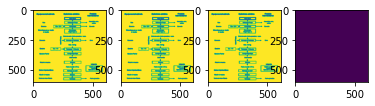

In [84]:
def couche(M):
    for i in range(M.shape[2]):
        sp.subplot(1,M.shape[2],i)
        sp.imshow(M[:,:,i])
couche(M)

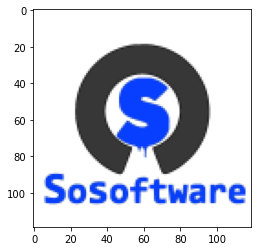

In [36]:
logo = sp.imread('sosoftware_white_new.png')
chat = sp.imread('cheval.jpg')
chatv = chat.copy()
logoc = functPooling(egalisation(logo,1,0),8)
sp.imshow(logoc)

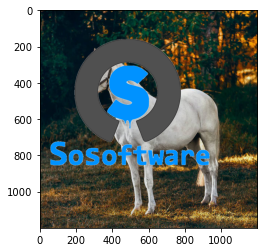

In [21]:
chatv = chat.copy()
pos = 5
for ic in range(logoc.shape[0]):
    i = ic + pos
    for jc in range(logoc.shape[1]):
        j = jc + pos
        if np.sum(logoc[ic, jc, :]) != 3.0:
            chatv[i,j,:] = logoc[ic,jc,:]
sp.imshow(chatv)

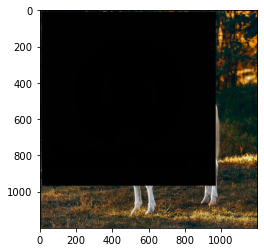

In [34]:

pos = 10
x = logo.shape[0] + pos
y = logo.shape[1] + pos
chatv[pos:x,pos:y,:] = np.where(np.sum(logo[:,:,:]!=(1,1,1),logo,chatv[pos:x,pos:y,:])
sp.imshow(chatv)

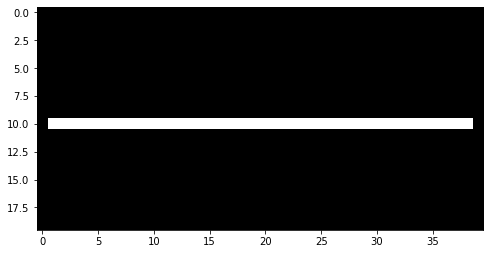

In [52]:
N = np.zeros((200,400))
N[:,200:]=1
sp.figure(figsize=(8,8))
def vertical(A):
    B = np.zeros((A.shape[0],A.shape[1]))
    for j in range(1, A.shape[1]-1):
        B[1:A.shape[0]-2,j] = A[1:A.shape[0]-2, j] - A[1:A.shape[0]-2,j-1]
    return B
H= np.zeros((20,40))
H[10:,:]=1

def horizontal(A):
    B = np.zeros((A.shape[0],A.shape[1]))
    for j in range(1, A.shape[0]-1):
        B[j,1:A.shape[1]-1] = A[j,1:A.shape[1]-1] - A[j-1,1:A.shape[1]-1]
    return B
def contourNaive(A):
    return np.sqrt(horizontal(A)**2 + vertical(A)**2)
sp.imshow(contourNaive(H),cmap='gray')

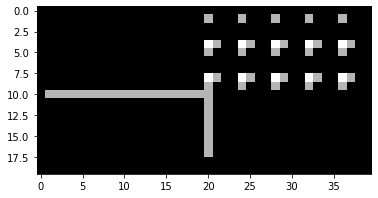

In [62]:
C = np.zeros((20,40))
C[10:,0:20] = 1
C[0:11:4,20::4] = 1
#sp.imshow(C,cmap='gray')
sp.imshow(contourNaive(C),cmap='gray')

In [90]:
chatv.min()

0

In [7]:
M = np.random.randint(0,255,[3,3])
N = np.zeros((5,5), int)
N[1:4,1:4] = M
N[0:5,0:5]

array([[  0,   0,   0,   0,   0],
       [  0, 184,  72, 118,   0],
       [  0, 228,   5,  40,   0],
       [  0,  62, 193,  72,   0],
       [  0,   0,   0,   0,   0]])

In [20]:
M = M[:,::-1]
M = M.astype(int)
M

array([[24, 58, 69],
       [63, 25, 50],
       [64, 67, 79]])

In [8]:
print(int(1.5))

1
